## House Price Prediction Model:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("banglore_house.csv")
df.head()

,area,bedroom,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
# Pure data ko ache se scale kar lo.........Scale karna is good practice agar you want better outcomes/predictions.
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
                               
scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [4]:
scaled_y.reshape(20,) #20 is the size of the dataset...you can also take X.shape[0]

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [5]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []      #just an additional step to record the values at different instances
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

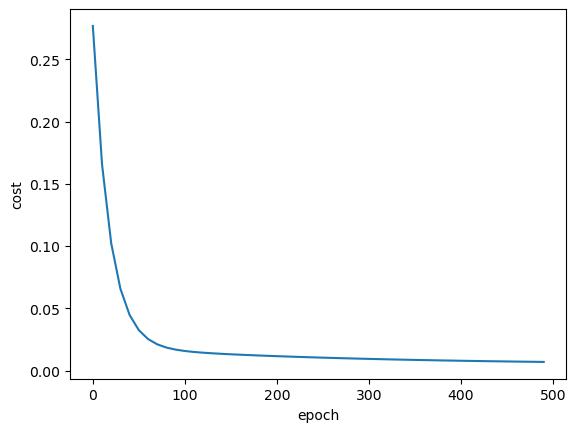

In [6]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [7]:
import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70998019, 0.67627481]), -0.2298653149914894, 0.00021530302898164482)

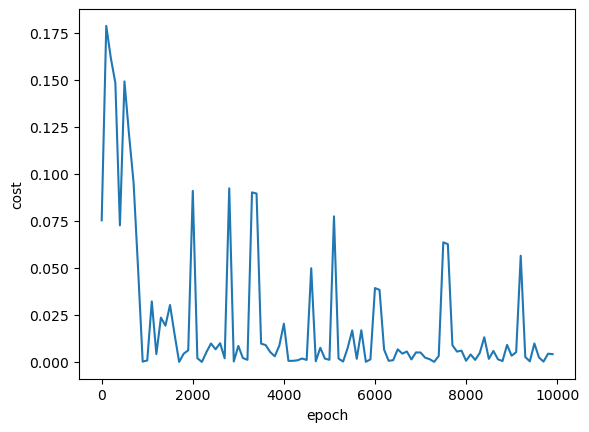

In [8]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [9]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area and bedroom )
    w_mini = np.ones(shape=(number_of_features)) 
    b_mini = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w_mini = w_mini - learning_rate * w_grad
            b_mini = b_mini - learning_rate * b_grad
                
            cost_mini = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost_mini)
            epoch_list.append(i)
        
    return w_mini, b_mini, cost_mini, cost_list, epoch_list

w_mini, b_mini, cost_mini, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w_mini, b_mini, cost_mini

(array([0.9248138 , 0.91019989]), 0.0760960133282225, 0.001505269456934617)

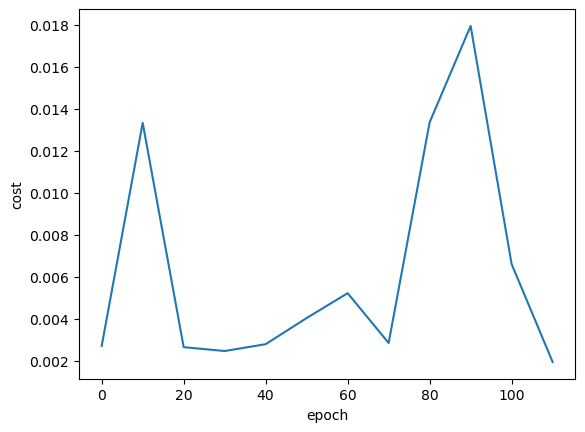

In [10]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [ ]:
#This is perofrming badly because of very small dataset

In [11]:
#We make the predoct function which takes arguments for different w and b values and accordingly predict the prices
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], and bias is b
    # equation for price is w1*area + w2*bedrooms + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

import warnings
warnings.filterwarnings("ignore")

In [12]:
predict(1500, 3, w,b) #trying to predict for some random data (1)

69.47860785714694

In [13]:
predict(1000,2, w,b) #trying to predict for some random data (2)

30.253094462442355

In [14]:
#taking the X_test and y_test values from the house_testing_data.csv file
df2 = pd.read_csv("house_testing_data.csv")
X_test = (df2.drop('price', axis='columns')).values
y_test = (df2['price'].values.reshape(df2.shape[0],1))
y_test

array([[82],
       [40],
       [37],
       [42],
       [75]], dtype=int64)

In [15]:
X_test

array([[1800,    3],
       [1100,    2],
       [1000,    2],
       [1170,    2],
       [1520,    3]], dtype=int64)

In [16]:
y_pred1 = []
y_pred2 = []
y_pred3 = []
for i in range(X_test.shape[0]) : 
    y_pred1.append(predict(X_test[[i][0]][0],X_test[[i][0]][1],w,b))
    y_pred2.append(predict(X_test[[i][0]][0],X_test[[i][0]][1],w_sgd, b_sgd))
    y_pred3.append(predict(X_test[[i][0]][0],X_test[[i][0]][1],w_mini, b_mini))

In [17]:
y_pred1

[79.35396924755915,
 33.544881592579756,
 30.253094462442355,
 35.84913258367593,
 70.13696528317443]

In [18]:
y_pred2

[79.66753376207309,
 33.707697739063626,
 30.402617549039928,
 36.0212538720802,
 70.41330923000675]

In [19]:
y_pred3

[146.76313143351084,
 85.90771119328707,
 81.60254348172539,
 88.92132859138025,
 134.7086618411381]

In [20]:
X_train = (df.drop('price', axis='columns')).values
y_train = (df['price'].values.reshape(df.shape[0],1))

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
# now we wil calculate the error using the mean_squared_error function : 
mse_sklearn = mean_squared_error(y_test, y_pred)
mse_sklearn1 = mean_squared_error(y_test, y_pred1)
mse_sklearn2 = mean_squared_error(y_test, y_pred2)
mse_sklearn3 = mean_squared_error(y_test, y_pred3)
print("By using Linear Regression model we get : ", mse_sklearn)
print("Batch Gradient descent : ", mse_sklearn1)
print("Stocastic Gradient Descent : ", mse_sklearn2)
print("Mini-Batch Graduent Descent : ", mse_sklearn3)  #mini batch has ~2800 as the mse....which means model has performed very badly

By using Linear Regression model we get :  18.570229609083448
Batch Gradient descent :  31.134608671930444
Stocastic Gradient Descent :  29.06841183598943
Mini-Batch Graduent Descent :  2811.5806801518634


In [23]:
y_pred      #predictions using the Linear Regression model

array([[78.61433019],
       [41.72331497],
       [37.42777497],
       [44.73019297],
       [66.58681818]])

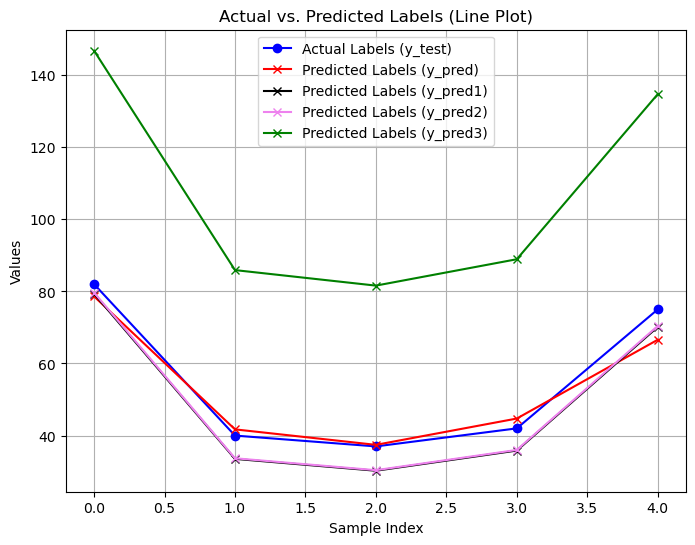

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_test (actual labels) and y_pred (predicted labels)
# y_test and y_pred should be NumPy arrays or lists

plt.figure(figsize=(8, 6))
plt.plot(y_test, color='blue', marker='o', linestyle='-', markersize=6, label='Actual Labels (y_test)')
plt.plot(y_pred, color='red', marker='x', linestyle='-', markersize=6, label='Predicted Labels (y_pred)')
plt.plot(y_pred1, color='black', marker='x', linestyle='-', markersize=6, label='Predicted Labels (y_pred1)')
plt.plot(y_pred2, color='violet', marker='x', linestyle='-', markersize=6, label='Predicted Labels (y_pred2)')
plt.plot(y_pred3, color='green', marker='x', linestyle='-', markersize=6, label='Predicted Labels (y_pred3)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Labels (Line Plot)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#The y_pred labels (red) line is the closest to the actual y_test (blue) line which means the best performance is given by the "Linear Regression model"
#The y_pred3 (green) line has not performed well....which is by using the mini-batch Gradient descent method